# Covid19 Increase in Future  Confirm Cases Estimation using LSTM


### In this project the estimation of increase in confirm cases cases in future days using LSTM can be predictied.


The dataset of Covid19 confirmed cases from January to July 2020 are taken into consideration from the site https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases available on daily update basis.

In [127]:
#import all the libraries that are needed
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load your data file that was downloaded from the link mentioned above
load_path = r'E:\Github_Projecta\COVID_19/'
filename = 'time_series_covid19_confirmed_global.csv'

data = pd.read_csv(load_path + filename)

In [3]:
data.info() #data details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 179 entries, Province/State to 7/14/20
dtypes: float64(2), int64(175), object(2)
memory usage: 372.1+ KB


In [4]:
data.describe() #describing the data


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,4.305337e+04,4.368457e+04,4.447219e+04,4.526872e+04,4.612225e+04,4.698672e+04,4.781168e+04,4.853518e+04,4.926463e+04,5.008846e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,2.152661e+05,2.185190e+05,2.232169e+05,2.278585e+05,2.327247e+05,2.378347e+05,2.425360e+05,2.467222e+05,2.508038e+05,2.559022e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.075000e+02,2.075000e+02,2.092500e+02,2.285000e+02,2.347500e+02,2.362500e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.232000e+03,1.234000e+03,1.237000e+03,1.268500e+03,1.280500e+03,1.280500e+03,1.344500e+03,1.364500e+03,1.383500e+03,1.425000e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.207925e+04,1.216600e+04,1.231225e+04,1.248650e+04,1.262450e+04,1.272250e+04,1.283775e+04,1.298425e+04,1.318775e+04,1.327100e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,2.891124e+06,2.936077e+06,2.996098e+06,3.054699e+06,3.117946e+06,3.184573e+06,3.245925e+06,3.304942e+06,3.364157e+06,3.431574e+06


This data describes about first four columns in data.head() are not needed as represents state, country, Latitude and Longitude which are unnecessary for our data analysis.

In [5]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,386,386,396,458,462,506,525,541


## Preprocessing the Data
Here the useless columns are removed from data and defined to required columns.

In [6]:
df = data.iloc[:,4:]
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,0,0,0,0,0,0,0,0,0,0,...,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,0,0,0,0,0,0,0,0,0,0,...,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,0,0,0,0,0,0,0,0,0,0,...,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,858,861
4,0,0,0,0,0,0,0,0,0,0,...,346,346,386,386,396,458,462,506,525,541


In [7]:
df.shape

(266, 175)

Data to be summed up as global cases confirmed per day. As it necessary to know the increment so the current - previous difference is done.


In [137]:
# evaluate cases to increase
daily_data = df.sum(axis=0)
print('1/22/20',daily_data[0])
print('1/23/20',daily_data[1])
print('increment cases',daily_data[1]-daily_data[0])

daily_data = daily_data.diff().fillna(daily_data[0]).astype(np.int64)
daily_data.head()

1/22/20 555
1/23/20 654
increment cases 99


1/22/20    555
1/23/20     99
1/24/20    287
1/25/20    493
1/26/20    684
dtype: int64

Now the main task is to split the data into sequences and increase the data accumulation through scaling between 0and 1 using minimaxscaler.

In [9]:
#It is better to view the data available shape and format.
daily_data.shape,
daily_data[:2]

1/22/20    555
1/23/20     99
dtype: int64

In [10]:
mm_scaler = MinMaxScaler() #to evaluate oor normalize the values between 0 and 1
mm_scaler = mm_scaler.fit(np.expand_dims(daily_data, axis=1))
total_data = mm_scaler.transform(np.expand_dims(daily_data, axis=1))
total_data.shape

(175, 1)

## Split the data into sequences

In [11]:
#These created train and test data should be split the sequence into input and output values depending on sequence length
def split_sequences(sequences_data,sequence_length):
    X,y = list(),list()
    for i in range(len(sequences_data)-sequence_length-1):
        # find the end of this pattern
        end_ix = i + sequence_length
        #gather input and output parts of the pattern
        seq_x, seq_y = sequences_data[i:(end_ix)],sequences_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [12]:
#sequence_length = 5 #previous notes of data can be remembered as 5 values
X, y = split_sequences(sequences_data=total_data, sequence_length=5)

In [13]:
#convert the data into torch.tensor from numpy array
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [14]:
X[:2],X.type(),X.shape

(tensor([[[0.0020],
          [0.0000],
          [0.0008],
          [0.0017],
          [0.0025]],
 
         [[0.0000],
          [0.0008],
          [0.0017],
          [0.0025],
          [0.0031]]]),
 'torch.FloatTensor',
 torch.Size([169, 5, 1]))

In [15]:
y[:2],y.type(),y.shape

(tensor([[0.0031],
         [0.0111]]),
 'torch.FloatTensor',
 torch.Size([169, 1]))

## Build LSTM Network for Future Prediction


In [16]:
class FutureDataPrediction(nn.Module):
    def __init__(self, feature_size, hidden_layer, seq_len,layers=2):
        super(FutureDataPrediction, self).__init__()
        self.hidden_layer = hidden_layer
        self.seq_len = seq_len
        self.layers = layers
        
        self.lstm = nn.LSTM(input_size=feature_size,hidden_size=hidden_layer,num_layers=layers,dropout=0.5)
        self.linear = nn.Linear(in_features=hidden_layer, out_features=1)
        
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.layers, self.seq_len, self.hidden_layer),
            torch.zeros(self.layers, self.seq_len, self.hidden_layer))
    
    def forward(self, data):
        lstm, self.hidden = self.lstm(data.view(len(data), self.seq_len, -1),self.hidden)
        previous_time_step = lstm.view(self.seq_len, len(data), self.hidden_layer)[-1]
        out = self.linear(previous_time_step)
        return out
   

Initialise the data layers for the LSTM, sequence length, hidden and feature size.
As it is require to reset the state after every epoch of turn to analyse again the data as clear.
Get the data of last time step that is required and sent to linear layer to forecast the future.

In [17]:
#initialise modelparameters
model = FutureDataPrediction(
    feature_size=1,
    hidden_layer=512,
    seq_len=5,
    layers=2)
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [18]:
model

FutureDataPrediction(
  (lstm): LSTM(1, 512, num_layers=2, dropout=0.5)
  (linear): Linear(in_features=512, out_features=1, bias=True)
)

## Train with all available data. (as the data is less)

In [19]:
def training(model,X_train,y_train,n_epochs):
    model.train()
    train_losses = []
    
    for epoch in range(n_epochs):
        model.reset_hidden_state() #the state has to be initialise to the start position after an epoch start.
        y_pred = model(X_train)
        loss = criterion(y_pred.float(), y_train) #attain loss to update weights.
        train_losses.append(loss.item())
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch} train loss: {loss.item()}')
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return train_losses
    
    

In [55]:
train_losses = training(model,X,y,n_epochs=400)

Epoch 0 train loss: 1.0659139156341553
Epoch 10 train loss: 1.1198647022247314
Epoch 20 train loss: 1.023852825164795
Epoch 30 train loss: 0.9812713265419006
Epoch 40 train loss: 1.0485345125198364
Epoch 50 train loss: 1.092063307762146
Epoch 60 train loss: 1.0485825538635254
Epoch 70 train loss: 1.0364075899124146
Epoch 80 train loss: 0.979249119758606
Epoch 90 train loss: 0.9204452633857727
Epoch 100 train loss: 0.9331093430519104
Epoch 110 train loss: 0.8070151209831238
Epoch 120 train loss: 0.7511496543884277
Epoch 130 train loss: 0.7198594808578491
Epoch 140 train loss: 0.7036007642745972
Epoch 150 train loss: 0.7757904529571533
Epoch 160 train loss: 0.6751794815063477
Epoch 170 train loss: 0.7007529139518738
Epoch 180 train loss: 0.730213463306427
Epoch 190 train loss: 0.7853600382804871
Epoch 200 train loss: 0.7485593557357788
Epoch 210 train loss: 0.7271243929862976
Epoch 220 train loss: 0.6930943131446838
Epoch 230 train loss: 0.6744089722633362
Epoch 240 train loss: 0.6822917

## Plot the loss graph in training

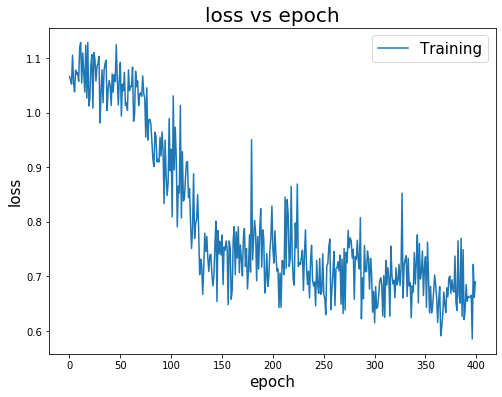

In [56]:
plt.figure(figsize=(8,6))
plt.plot(train_losses, label='Training')    
plt.title("loss vs epoch",fontsize=20)
plt.xlabel("epoch",fontsize=15)
plt.ylabel("loss",fontsize=15)
plt.legend(fontsize=15)
plt.show()

The spikes in the loss may be due to the irregular of data wih daily increase or decrease of incoming confirmed cases but anyways loss is decreasing.

## Test data as the aim to predict the future confirm cases

In [128]:
def testing(model,predict_days,sequence_length):
    model.eval()
    with torch.no_grad():
        test_sequence = X[:1] #to send the last data of X as input to network to predict future
        predicts = []

        for _ in range(predict_days):
            y_pred = model(test_sequence)
            predict = torch.flatten(-y_pred).item() #flatten the values 
            predicts.append(predict)
            
            test_seq = test_sequence.numpy().flatten() #flatten old sequence to connect with new sequence
            test_seq = np.append(test_seq, [predict]) #obtain new predicted as sequence
            test_seq = test_seq[1:] #to perform last values
            testing_seq = torch.as_tensor(test_seq).view(1, sequence_length, 1).float()
    return predicts

In [129]:
predict_days = 30 #next one month data cases can be an estimated confirm
predict_cases = testing(model,predict_days,sequence_length =5) #same sequence_length from before data split
predict_cases

[0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340641260147095,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340641260147095,
 0.8340641260147095,
 0.8340640664100647,
 0.8340640664100647,
 0.8340641260147095,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340641260147095,
 0.8340641260147095,
 0.8340641260147095,
 0.8340641260147095,
 0.8340641260147095,
 0.8340640664100647,
 0.8340640664100647,
 0.8340640664100647,
 0.8340641260147095,
 0.8340641260147095]

In [130]:
#reverse values from 0 to 1 by minmaxscaler to original values
future_cases = mm_scaler.inverse_transform(np.expand_dims(predict_cases, axis=0)).flatten() 
predict_index = pd.date_range(
                  start=daily_data.index[-1],
                  periods=predict_days + 1,
                  closed='right')
future_cases = pd.Series(
                  data=future_cases,
                  index=predict_index) #future cases that are generated approximately by model


In [131]:
#attaining previous cases in same date time format
previous_index = pd.date_range(
                  start=daily_data.index[0],
                  periods=len(daily_data))
previous_cases = pd.Series(
                  data=daily_data,
                  index=previous_index)

In [132]:
previous_cases

2020-01-22       555
2020-01-23        99
2020-01-24       287
2020-01-25       493
2020-01-26       684
               ...  
2020-07-10    229949
2020-07-11    219441
2020-07-12    192449
2020-07-13    194034
2020-07-14    219139
Freq: D, Length: 175, dtype: int64

In [133]:
future_cases

2020-07-15    191808.625664
2020-07-16    191808.625664
2020-07-17    191808.625664
2020-07-18    191808.625664
2020-07-19    191808.625664
2020-07-20    191808.639364
2020-07-21    191808.625664
2020-07-22    191808.625664
2020-07-23    191808.625664
2020-07-24    191808.639364
2020-07-25    191808.639364
2020-07-26    191808.625664
2020-07-27    191808.625664
2020-07-28    191808.639364
2020-07-29    191808.625664
2020-07-30    191808.625664
2020-07-31    191808.625664
2020-08-01    191808.625664
2020-08-02    191808.625664
2020-08-03    191808.625664
2020-08-04    191808.639364
2020-08-05    191808.639364
2020-08-06    191808.639364
2020-08-07    191808.639364
2020-08-08    191808.639364
2020-08-09    191808.625664
2020-08-10    191808.625664
2020-08-11    191808.625664
2020-08-12    191808.639364
2020-08-13    191808.639364
Freq: D, dtype: float64

## Plot Increment in Previous & Future Covid Confirmed Cases

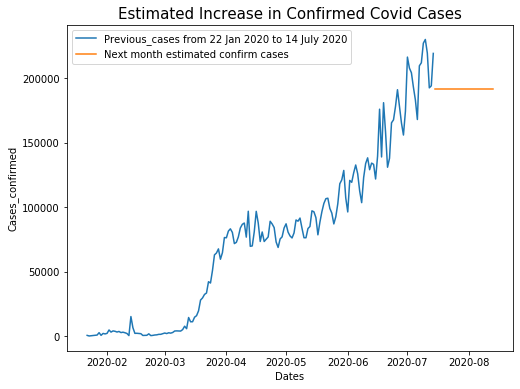

In [143]:
plt.figure(figsize=(8,6))
plt.plot(previous_cases, label='Previous_cases from 22 Jan 2020 to 14 July 2020')
plt.plot(future_cases, label='Next month estimated confirm cases')
plt.title("Estimated Increase in Confirmed Covid Cases",fontsize=15)
plt.xlabel("Dates",fontsize=10)
plt.ylabel("Cases_confirmed",fontsize=10)
plt.legend(fontsize=10)

### References

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

https://www.curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/